In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import text

In [2]:
df=pd.read_csv('fixed_simulated_transaction_2024.csv')
backup_df=df
df['Timestamp']=pd.to_datetime(df['Timestamp'],format='%Y/%m/%d %H:%M')
df['Date']=pd.to_datetime(df['Timestamp'].dt.date)
df['day_of_week']=df['Timestamp'].dt.dayofweek
df['is_weekend']=np.where(df['day_of_week']>4,1,0)
df['month']=df['Timestamp'].dt.month
df.loc[df.Amount>0,'Classification Title']='Income'
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230596 entries, 0 to 230595
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Timestamp               230596 non-null  datetime64[ns]
 1   Account No              230596 non-null  float64       
 2   Balance                 230596 non-null  float64       
 3   Amount                  230596 non-null  float64       
 4   Third Party Account No  230596 non-null  float64       
 5   Third Party Name        230596 non-null  object        
 6   Classification Number   230596 non-null  float64       
 7   Classification Title    230596 non-null  object        
 8   Date                    230596 non-null  datetime64[ns]
 9   day_of_week             230596 non-null  int64         
 10  is_weekend              230596 non-null  int32         
 11  month                   230596 non-null  int64         
dtypes: datetime64[ns](2), float64(

# Class Based

In [3]:
tp_class=df.sort_values('Classification Title').iloc[:,7].drop_duplicates().to_list()
print(tp_class)
print(len(tp_class))

['ActiveLifestyle&Fitness', 'ComprehensiveRetailMarket', 'Dining&Leisure', 'FashionTrend', 'FinancialServices&Accommodation', 'Health&LivingServices', 'Income', 'Lifestyle&EntertainmentCrafts', 'Personal', 'Technology&CulturalDevelopment', 'Unknown']
11


In [4]:
tp_df=list(range(11))
for n in tp_df:
    tp_df[n]=(df[df['Classification Title']==tp_class[n]]
              .drop(df.columns[[0,1,2,4,5,6,7,9,10,11]],axis=1)
              .groupby(['Date'])
              .agg({'sum','count'})
             )

### Timestamp vs Sum of Amount (per day)

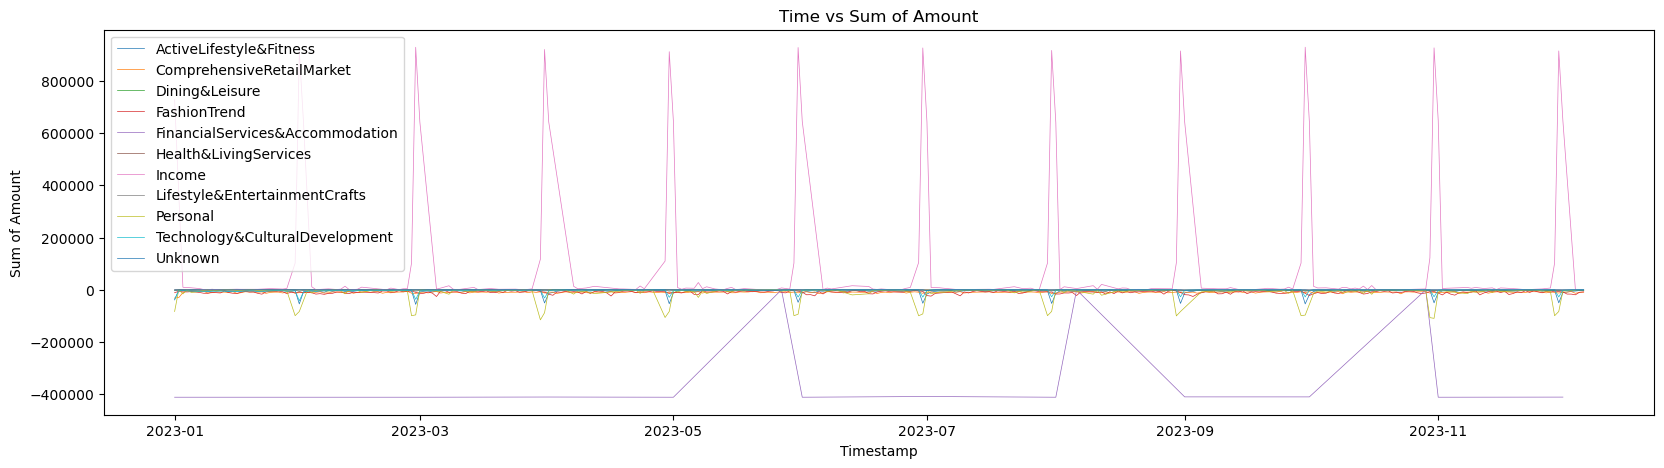

In [5]:
plt.figure(figsize=(20,5))
for n in range(11):
    plt.plot(tp_df[n]['Amount']['sum'],label=tp_class[n],linewidth=.5)
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Sum of Amount')
plt.title('Time vs Sum of Amount')
plt.show()

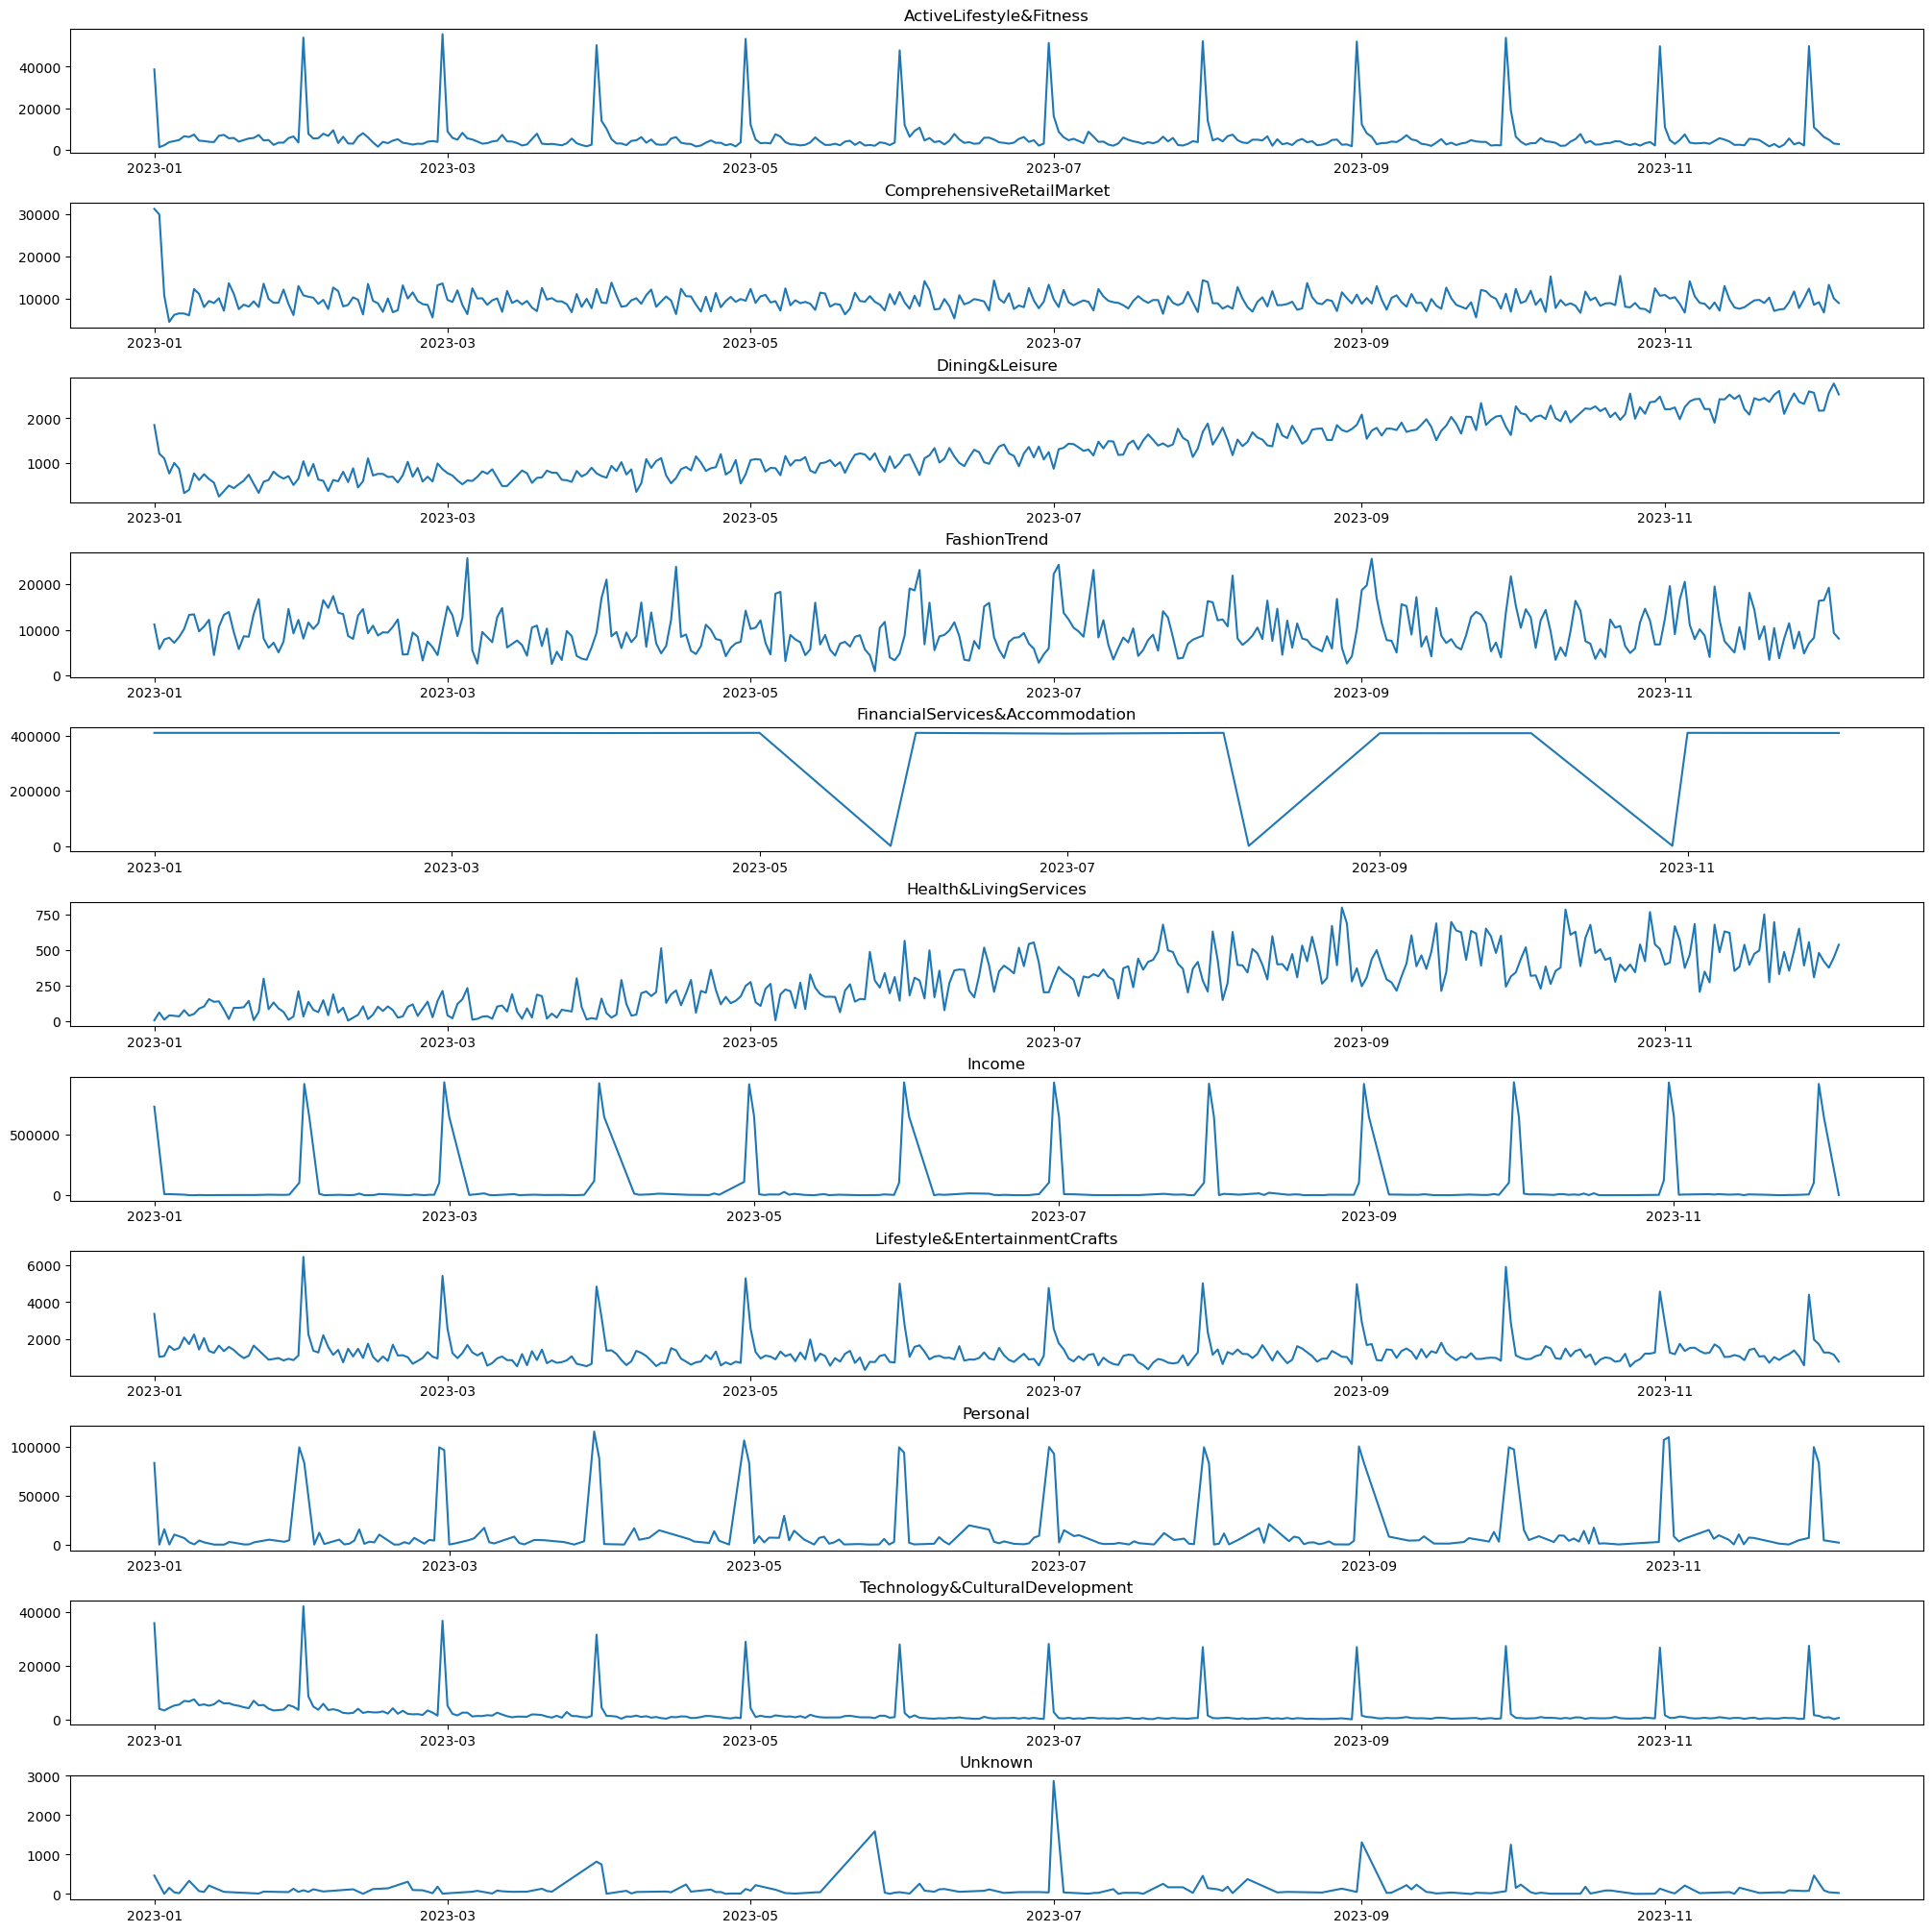

In [6]:
f,ax=plt.subplots(11,1,figsize=(20,20),constrained_layout=True)
for n in range(11):
    ax[n].plot(tp_df[n]['Amount']['sum'].abs())
    ax[n].title.set_text(tp_class[n])

### Timestamp vs Count of Amount (per day)

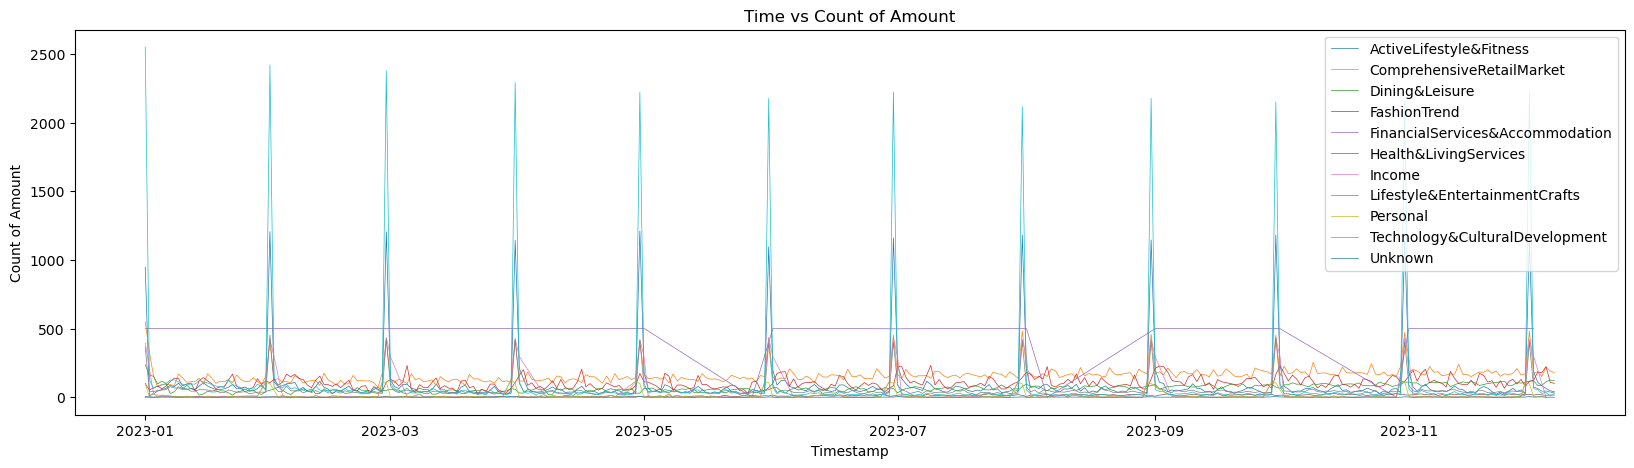

In [7]:
plt.figure(figsize=(20,5))
for n in range(11):
    plt.plot(tp_df[n]['Amount']['count'],label=tp_class[n],linewidth=.5)
plt.legend()
plt.xlabel('Timestamp')
plt.ylabel('Count of Amount')
plt.title('Time vs Count of Amount')
plt.show()

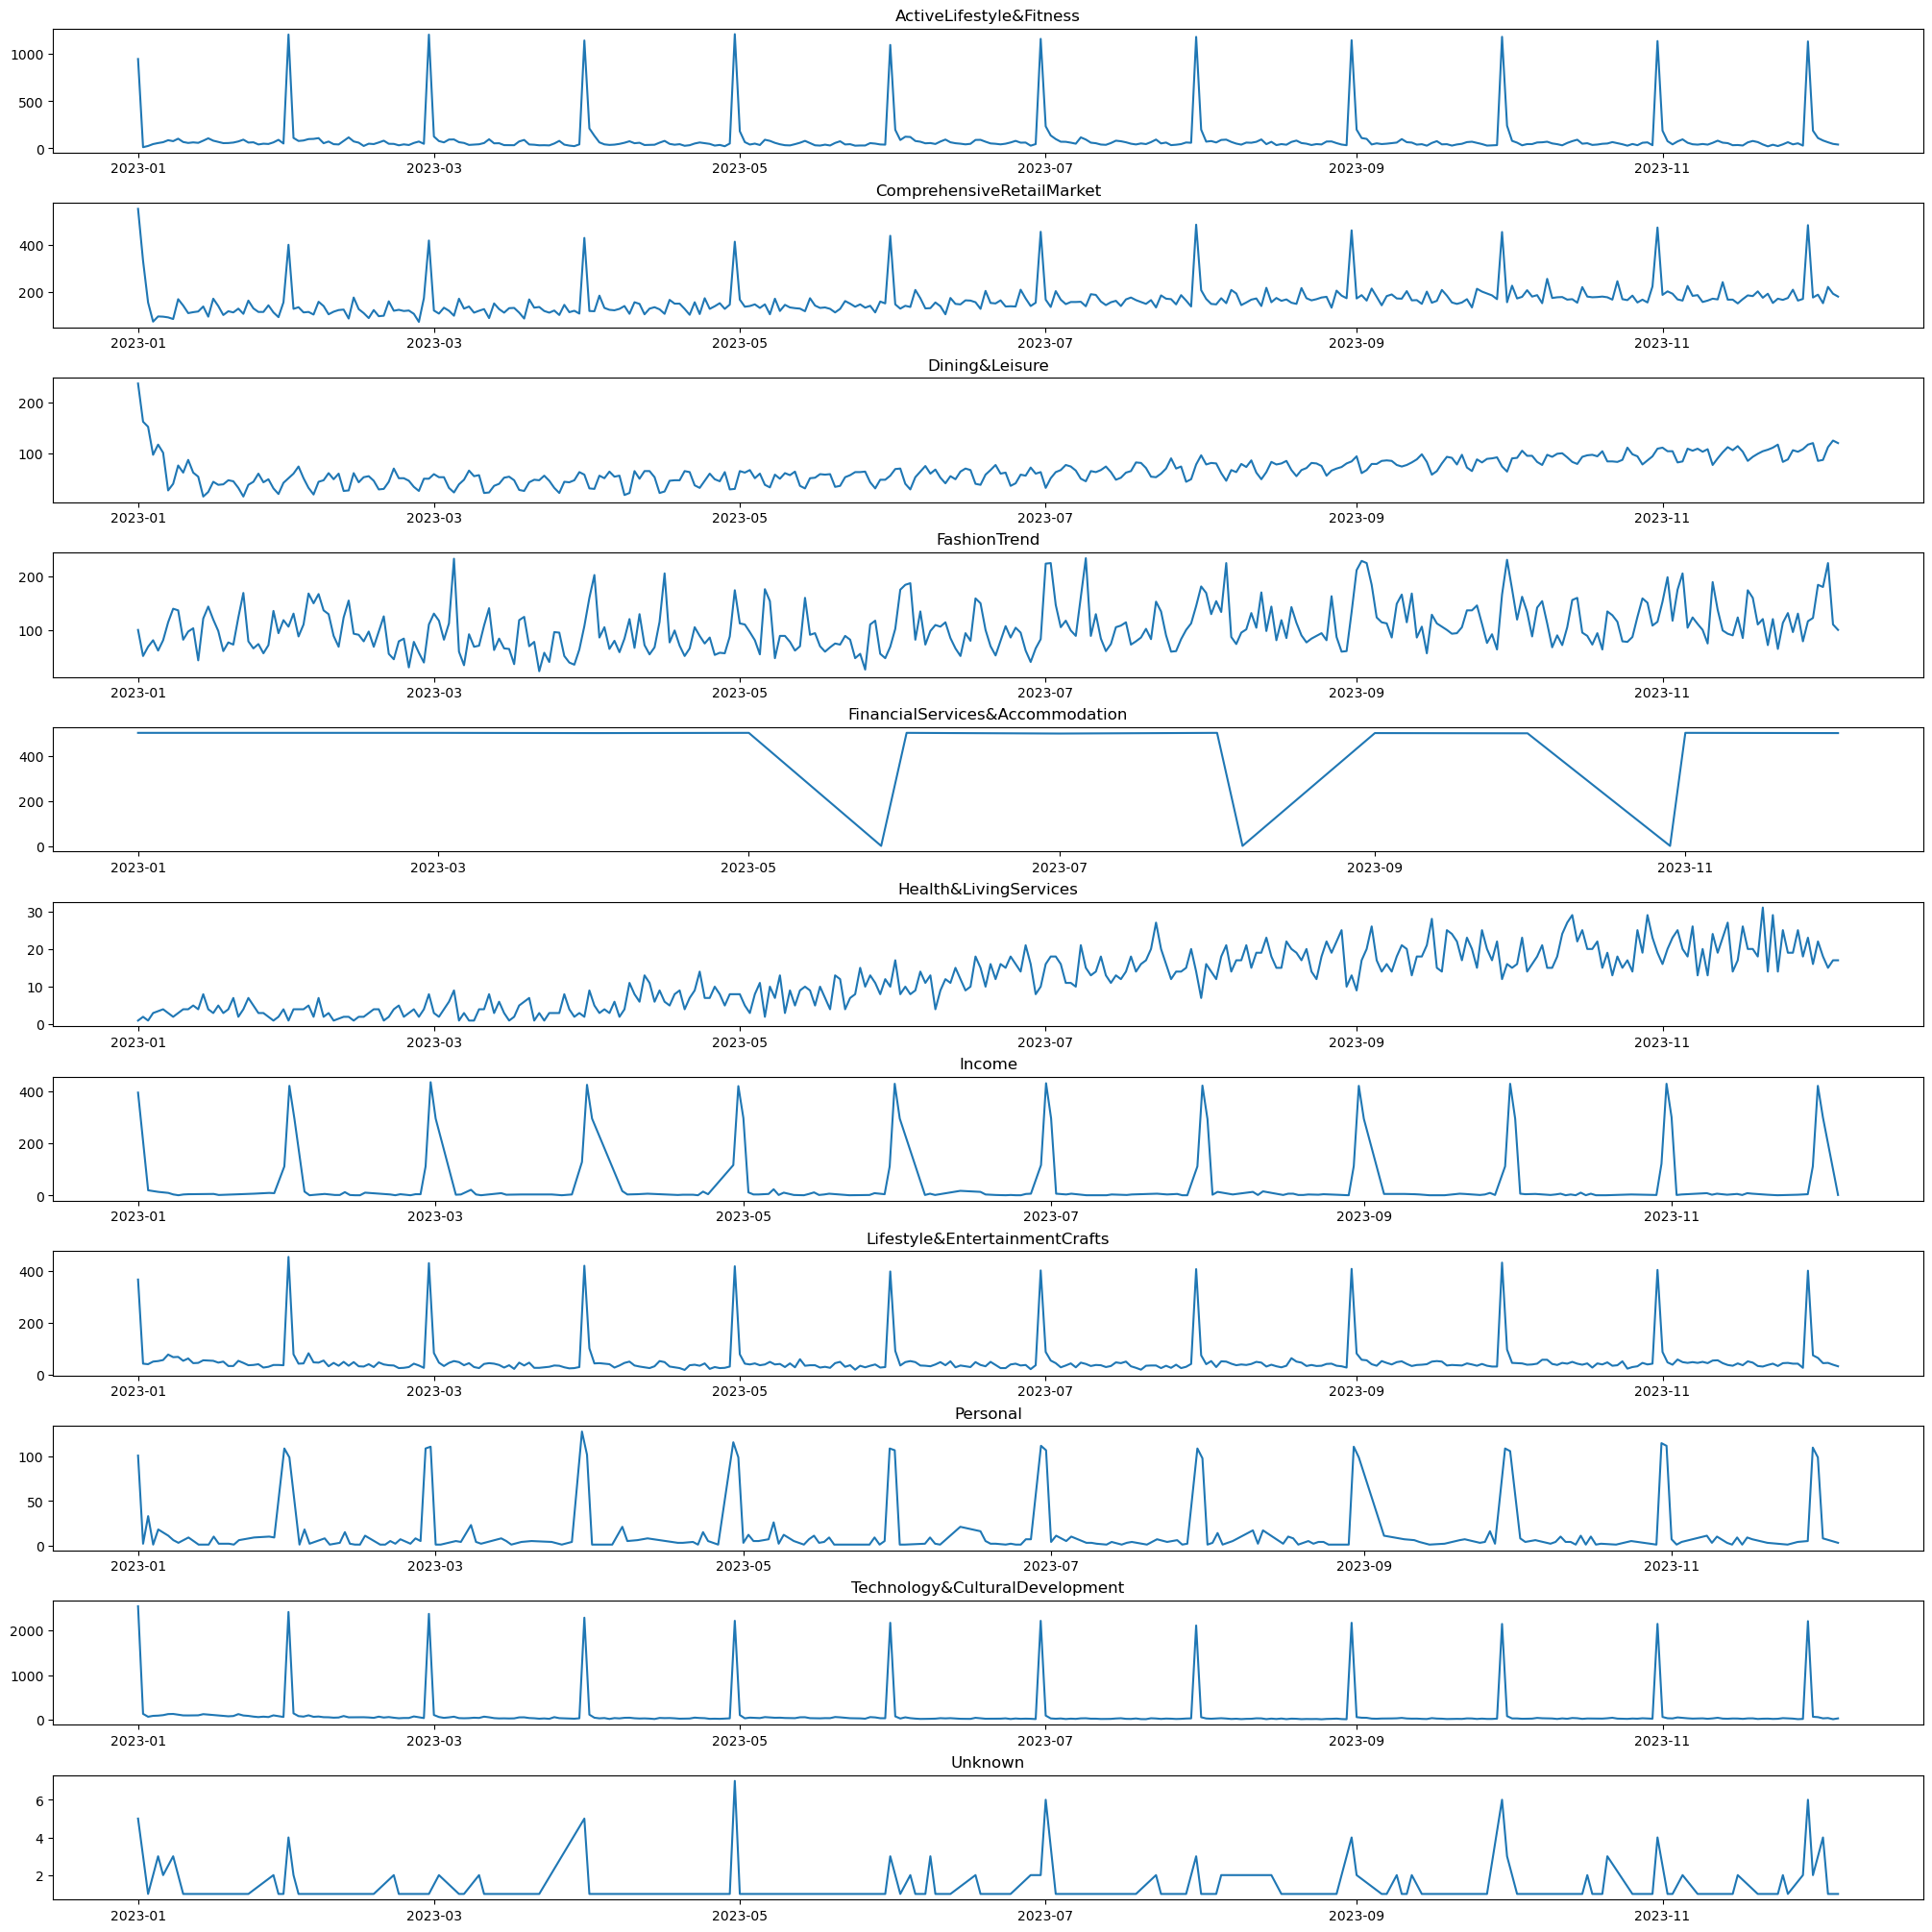

In [8]:
f,ax=plt.subplots(11,1,figsize=(20,20),constrained_layout=True)
for n in range(11):
    ax[n].plot(tp_df[n]['Amount']['count'])
    ax[n].title.set_text(tp_class[n])

### Weekdays vs Weekend (per day)

In [9]:
week_df=[5,2]
for n in range(2):
    week_df[n]=(df[df.is_weekend==n]
                .drop(df.columns[[0,1,2,4,5,6,8,9,11]],axis=1)
                .groupby(['Classification Title'])
                .agg({'sum','count'})
                /week_df[n]
               )

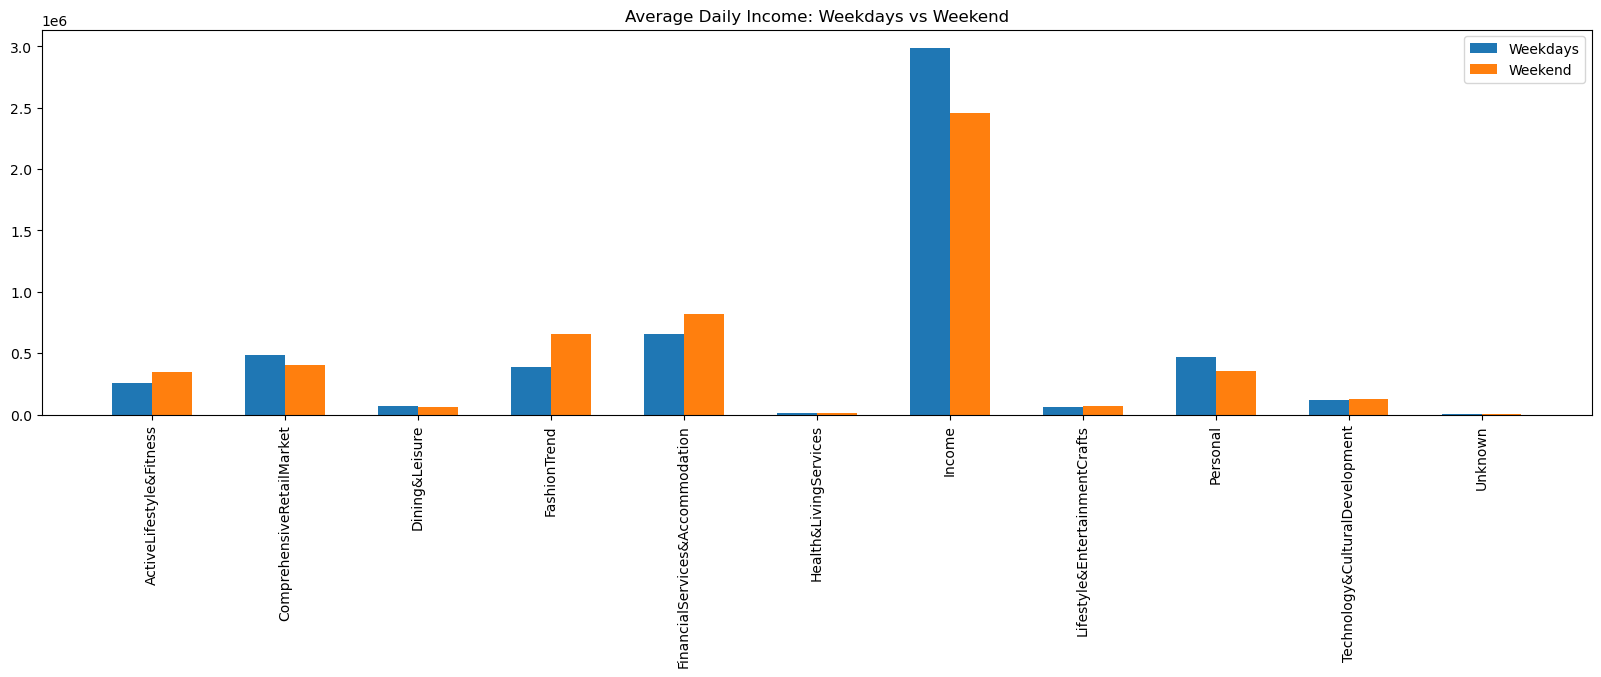

In [10]:
plt.figure(figsize=(20,5))
X_axis=np.arange(11)
labels=['Weekdays','Weekend']
for n in range(2):
    plt.bar(X_axis+(n-0.5)*.3,week_df[n]['Amount']['sum'].abs(),.3,label=labels[n])
plt.xticks(X_axis,tp_class,rotation=90)
plt.title('Average Daily Income: Weekdays vs Weekend')
plt.legend()
plt.show()

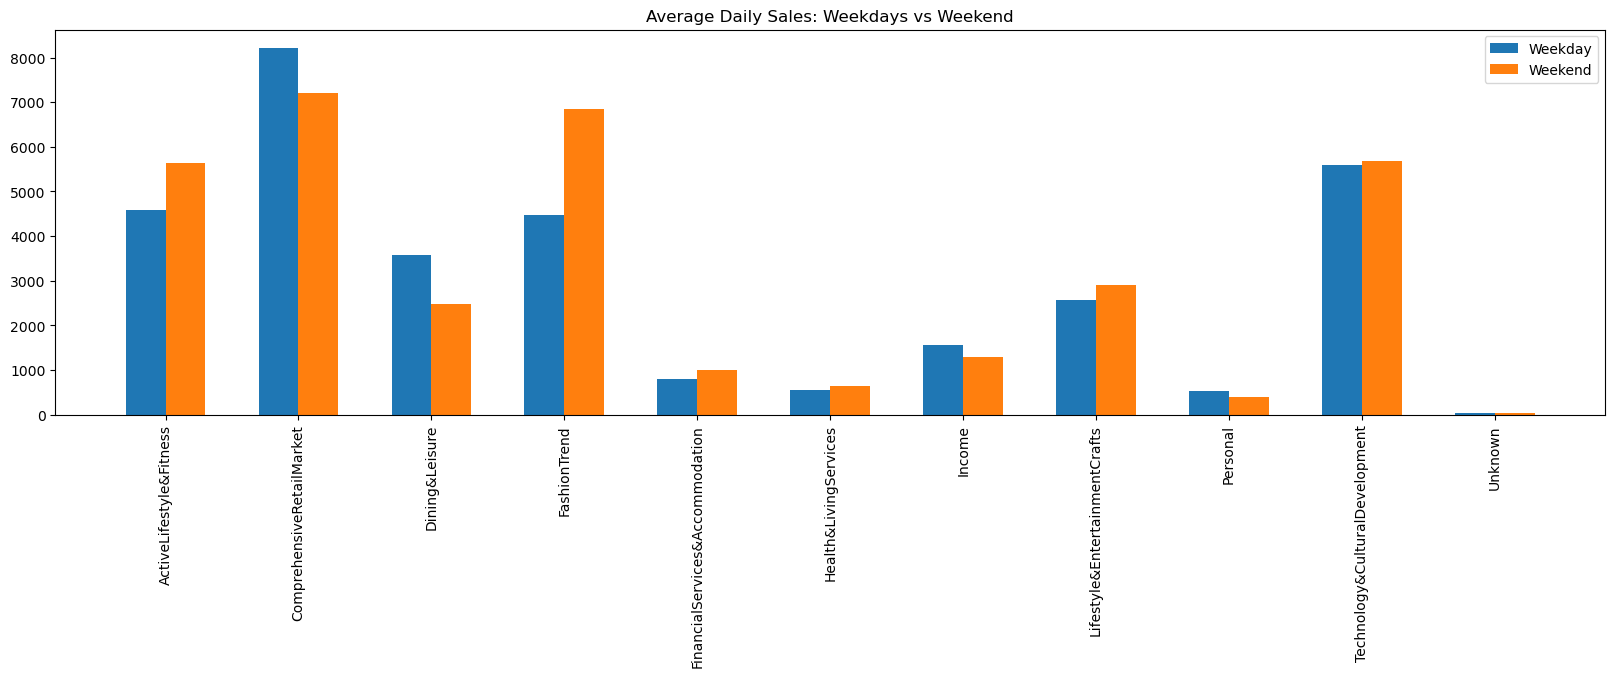

In [11]:
plt.figure(figsize=(20,5))
X_axis=np.arange(11)
labels=['Weekday','Weekend']
for n in range(2):
    plt.bar(X_axis+(n-0.5)*.3,week_df[n]['Amount']['count'],.3,label=labels[n])
plt.xticks(X_axis,tp_class,rotation=90)
plt.title('Average Daily Sales: Weekdays vs Weekend')
plt.legend()
plt.show()

### Monthly

In [12]:
month_df=(df[df['Classification Title']!='Income']
          .drop(df.columns[[0,1,2,4,5,6,7,8,9,10]],axis=1)
          .groupby('month')
          .agg({'sum','count','mean'})
          .abs()
         )
month_income_df=(df[df['Classification Title']=='Income']
                 .drop(df.columns[[0,1,2,4,5,6,7,8,9,10]],axis=1)
                 .groupby('month')
                 .agg({'sum','count','mean'})
                 .abs()
                 )
month_dict=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

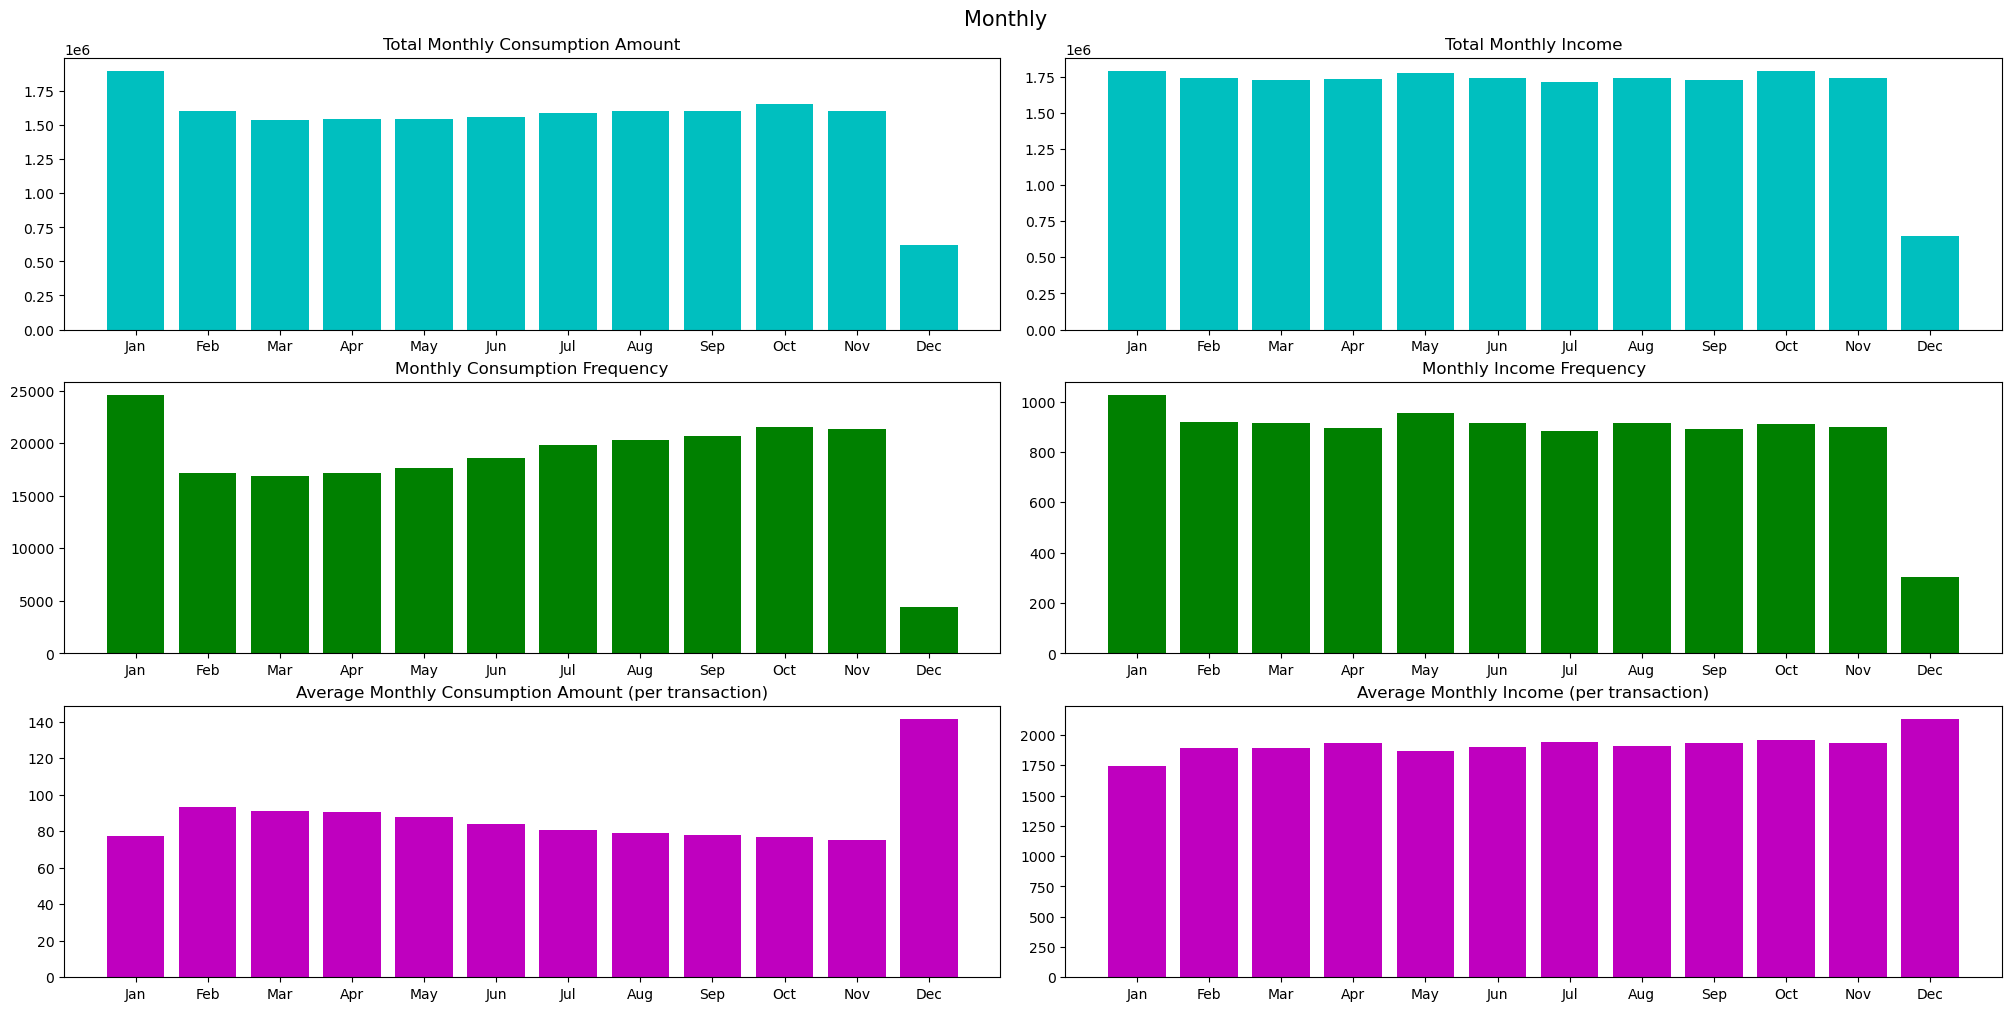

In [13]:
f,ax=plt.subplots(3,2,figsize=(20,10),constrained_layout=True)

ax[0,0].bar(month_dict,month_df['Amount']['sum'],color='c')
ax[0,0].title.set_text('Total Monthly Consumption Amount')

ax[0,1].bar(month_dict,month_income_df['Amount']['sum'],color='c')
ax[0,1].title.set_text('Total Monthly Income')

ax[1,0].bar(month_dict,month_df['Amount']['count'],color='g')
ax[1,0].title.set_text('Monthly Consumption Frequency')

ax[1,1].bar(month_dict,month_income_df['Amount']['count'],color='g')
ax[1,1].title.set_text('Monthly Income Frequency')

ax[2,0].bar(month_dict,month_df['Amount']['mean'],color='m')
ax[2,0].title.set_text('Average Monthly Consumption Amount (per transaction)')

ax[2,1].bar(month_dict,month_income_df['Amount']['mean'],color='m')
ax[2,1].title.set_text('Average Monthly Income (per transaction)')

plt.suptitle('Monthly',fontsize=15)
plt.show()

### Total Balance

In [14]:
def total_balance(date):
    temp_df=df[df.Date<date].drop_duplicates(subset=['Account No'],keep='last')
    return round(temp_df.iloc[:,2].sum(),2)

In [15]:
def date_of_arrival(date):
    temp_df=df[df.Date<date].drop_duplicates(subset=['Account No'],keep='last')
    if len(temp_df)>=977:
        return date

In [16]:
x_arr=np.arange(np.datetime64('2023-01-01'),np.datetime64('2023-12-07'),np.timedelta64(1,'D'))
y_arr=np.array(list(map(total_balance,x_arr)))
arrival_date=next((date for date in list(map(date_of_arrival,x_arr)) if date is not None),'All are Nones')

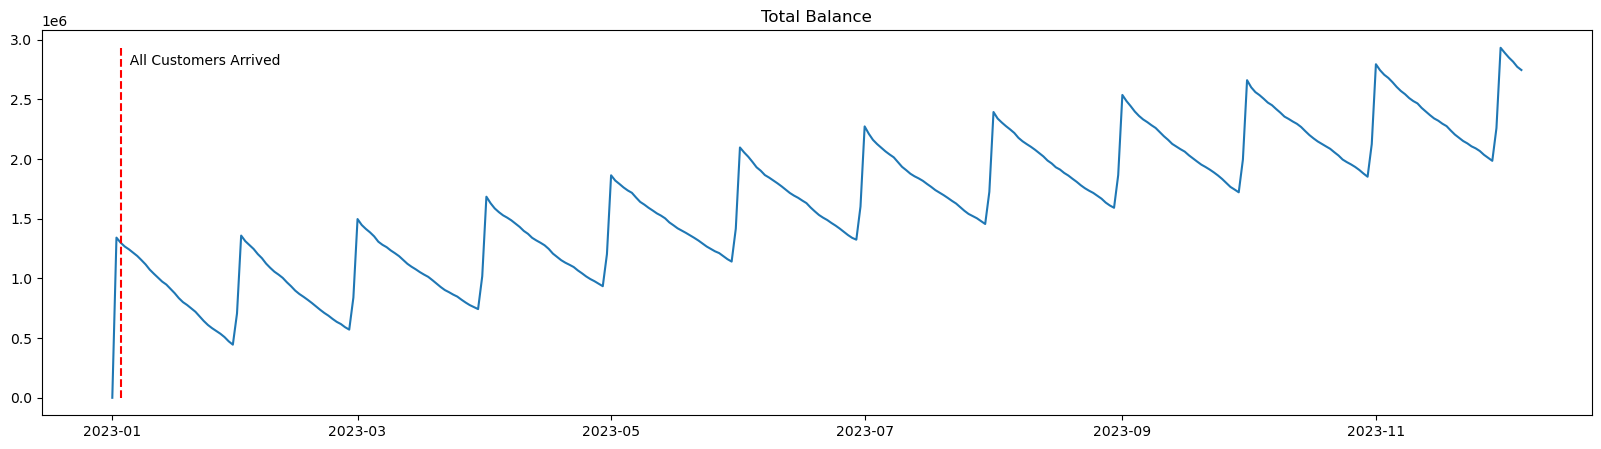

In [17]:
plt.figure(figsize=(20,5))
x=x_arr
y=y_arr
plt.plot(x,y)
plt.vlines(arrival_date,y.min(),y.max(),colors='r',linestyles='--',linewidth=1.5)
text(arrival_date,y.max()*.95,'  All Customers Arrived')
plt.title('Total Balance')
plt.show()

### Income by Classification

In [18]:
income_df=backup_df[backup_df['Amount']>0]
income_df=income_df.iloc[:,[3,6]].groupby('Classification Number').agg(sum)

In [19]:
class_index=['Personal & Unknown',
             'Technology & Cultural Development',
             'Fashion Trend','Lifestyle & Entertainment Crafts',
             'Health & Living Services',
             'Dining & Leisure',
             'Comprehensive Retail Market',
             'Active Lifestyle & Fitness',
             'Financial Services & Accommodation']
income_df['Classification Title']=class_index
income_df.set_index('Classification Title',inplace=True)

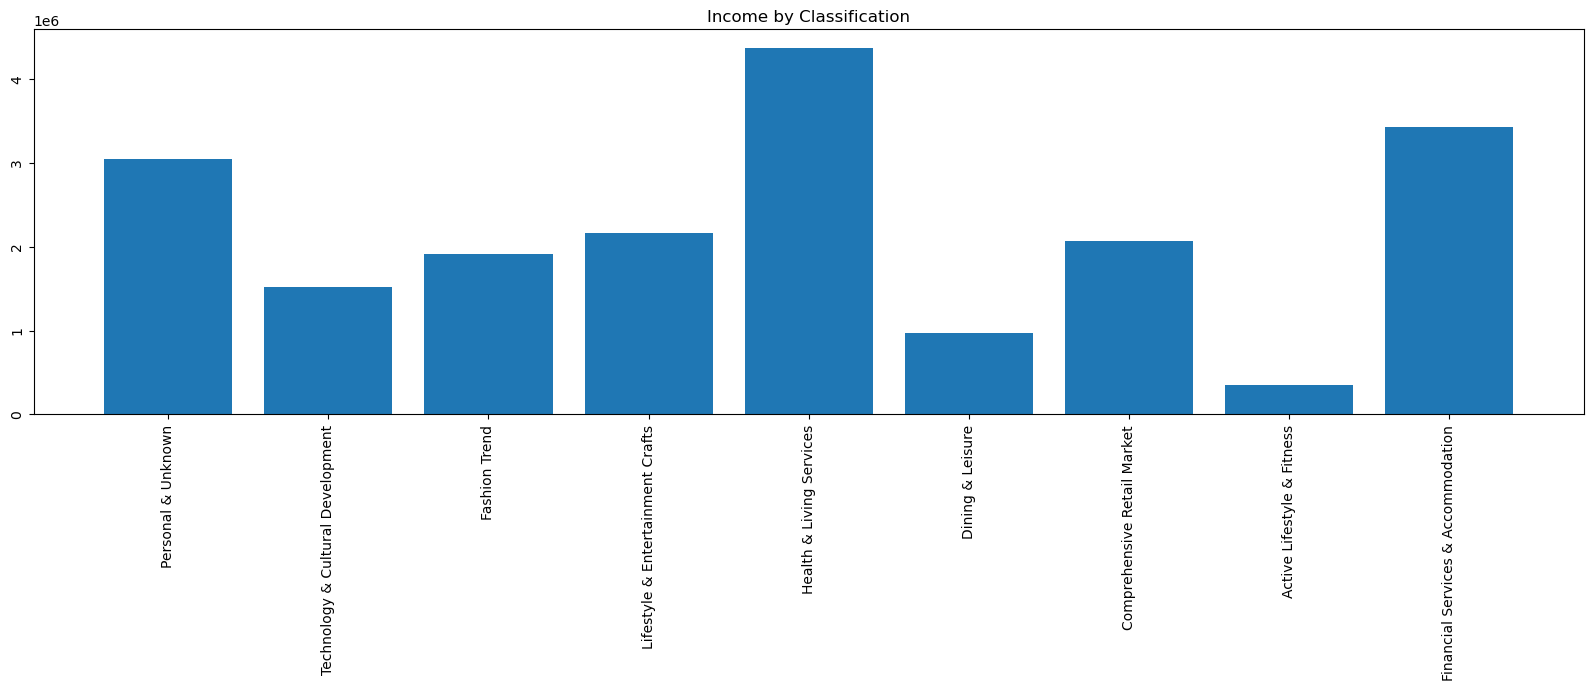

In [20]:
plt.figure(figsize=(20,5))
plt.bar(income_df.index,income_df.Amount)
plt.tick_params(labelrotation=90)
plt.title('Income by Classification')
plt.show()

# Customer Based

In [21]:
c_id=858989281

In [22]:
customers=list(set(df['Account No'].to_list()))
cf=df[df['Account No']==c_id]
c_df=cf.iloc[:,[0,2,3,6,7]].set_index('Timestamp')
classed_df=c_df.iloc[:,[1,3]].groupby(['Classification Title']).agg({'sum','count'})

In [23]:
month_cf=(cf[cf['Classification Title']!='Income']
          .drop(cf.columns[[0,1,2,4,5,6,7,8,9,10]],axis=1)
          .groupby('month')
          .agg({'sum','count','mean'})
          .abs()
         )
month_income_cf=(cf[cf['Classification Title']=='Income']
                 .drop(cf.columns[[0,1,2,4,5,6,7,8,9,10]],axis=1)
                 .groupby('month')
                 .agg({'sum','count','mean'})
                 .abs()
                 )
month_dict=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [24]:
c_df

,Balance,Amount,Classification Number,Classification Title
Timestamp,,,,
2023-01-01 00:00:00,7104.89,5292.80,1.0,Income
2023-01-01 00:00:00,6105.89,-999.00,8.0,FinancialServices&Accommodation
2023-01-01 00:00:00,6089.90,-15.99,1.0,Technology&CulturalDevelopment
2023-01-01 09:20:00,6084.91,-4.99,1.0,Technology&CulturalDevelopment
2023-01-02 20:40:00,5926.32,-158.59,6.0,ComprehensiveRetailMarket
...,...,...,...,...
2023-12-05 18:08:00,30418.57,-149.79,2.0,FashionTrend
2023-12-05 18:31:00,30363.28,-55.29,2.0,FashionTrend
2023-12-06 06:28:00,30346.93,-16.35,5.0,Dining&Leisure


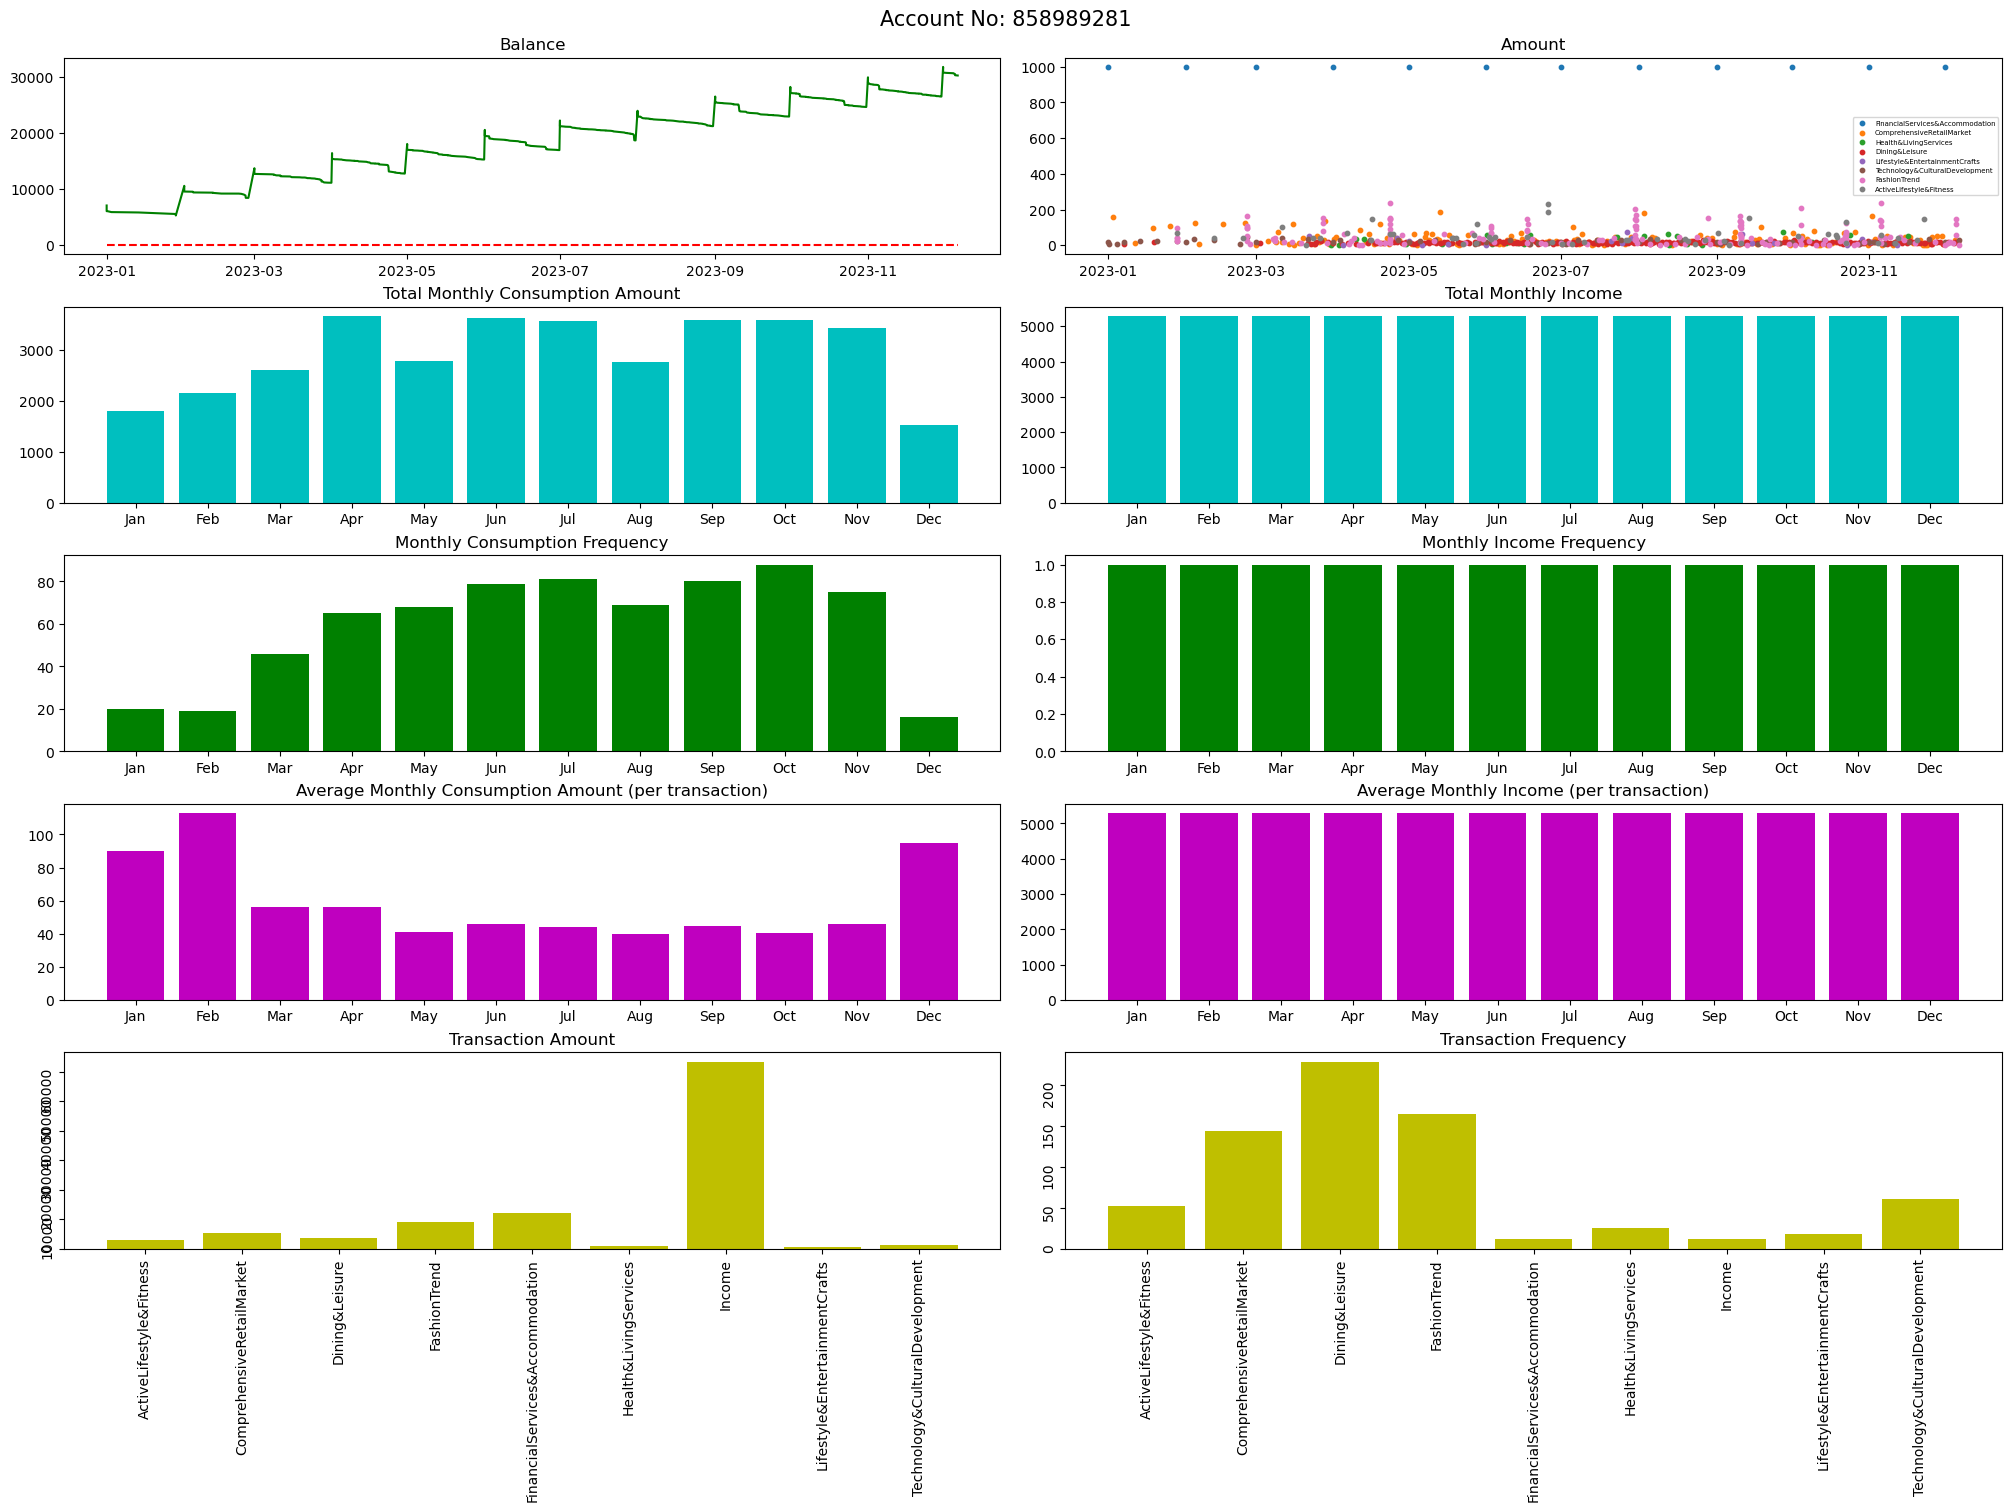

In [25]:
f,ax=plt.subplots(5,2,figsize=(20,15),constrained_layout=True)

ax[0,0].plot(c_df.iloc[:,0],'g')
ax[0,0].hlines(0,c_df.index.min(),c_df.index.max(),colors='r',linestyles='--',linewidth=1.5)
ax[0,0].title.set_text('Balance')

cs=list(set(c_df.iloc[:,3].to_list()))
for c in cs:
    if c!='Income':
        temp_df=c_df[c_df['Classification Title']==c]
        ax[0,1].scatter(temp_df.index,temp_df.iloc[:,1].abs(),s=10,label=c)
#ax[0,1].scatter(not_income.index,not_income.iloc[:,1].abs(),c=not_income.iloc[:,2])
ax[0,1].legend(prop={'size':5})
ax[0,1].title.set_text('Amount')

ax[1,0].bar(month_dict,month_cf['Amount']['sum'],color='c')
ax[1,0].title.set_text('Total Monthly Consumption Amount')

ax[1,1].bar(month_dict,month_income_cf['Amount']['sum'],color='c')
ax[1,1].title.set_text('Total Monthly Income')

ax[2,0].bar(month_dict,month_cf['Amount']['count'],color='g')
ax[2,0].title.set_text('Monthly Consumption Frequency')

ax[2,1].bar(month_dict,month_income_cf['Amount']['count'],color='g')
ax[2,1].title.set_text('Monthly Income Frequency')

ax[3,0].bar(month_dict,month_cf['Amount']['mean'],color='m')
ax[3,0].title.set_text('Average Monthly Consumption Amount (per transaction)')

ax[3,1].bar(month_dict,month_income_cf['Amount']['mean'],color='m')
ax[3,1].title.set_text('Average Monthly Income (per transaction)')

ax[-1,0].bar(classed_df['Amount']['sum'].index,classed_df['Amount']['sum'].abs(),color='y')
ax[-1,0].tick_params(labelrotation=90)
ax[-1,0].title.set_text('Transaction Amount')

ax[-1,1].bar(classed_df['Amount']['count'].index,classed_df['Amount']['count'],color='y')
ax[-1,1].tick_params(labelrotation=90)
ax[-1,1].title.set_text('Transaction Frequency')

plt.suptitle('Account No: '+str(int(c_id)),fontsize=15)
plt.show()